<center><img src="https://github.com/Government-DecisionMaking/publicValue_ahp/blob/main/logo.jpg?raw=true" width="900"/></center>

_____
<a id='home'></a>

[![badge](https://img.shields.io/badge/LAUNCH_magallanes-publicValue_code-579ACA.svg?logo=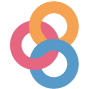)](https://mybinder.org/v2/git/https%3A%2F%2Fgithub.com%2FGovernment-DecisionMaking%2FpublicValue_ahp/0ba78ed98af661dffd0baa26456fa4f5af521209?urlpath=lab%2Ftree%2Findex.ipynb)

# Multicriteria Decision-Making (AHP)


In [1]:
%%html
<iframe src="https://docs.google.com/presentation/d/e/2PACX-1vT3lc97qO2QHlO2LGcxt88QpDFMPY68KH12TX6AGgB-Xv9TddeD5E9iOGYenrK8mpMoSdjfoH5LdCyW/pubembed?start=false&loop=false&delayms=3000" frameborder="0" width="960" height="569" allowfullscreen="true" mozallowfullscreen="true" webkitallowfullscreen="true"></iframe>

## AHP in Python

# The Comparissons


1. Prepare data file with the comparissons: You will use an excel file for this. In this step, you and the other decision makers will make pairwise comparissons for:
   
a. The alternatives for each criterion.

b. The criteria themselves.

I have prepared a GoogleSheets file, which looks like this:

In [2]:
%%html
<iframe src="https://docs.google.com/spreadsheets/d/e/2PACX-1vQZiYnm5fKCIHCZR4yOqM8z9yPbgWfXRHwwfqdzOeHt67BO1-_20bGoUXeuKT2hG9kzsZXPJX6P1xdj/pubhtml?widget=true&amp;headers=false" width="600" height="300"></iframe>

Notice: 

1. each 'sol' belongs to a member of the group.
2. each 'sol' is compared to another, under a particular criterion.
3. The criteria also compare between one another.
4. Use the same case always (lower/upper). NO spaces, no characters beyond alphabet.

2. Get the data into Python

YOU ONLY PROVIDE THE LINK to your pairwise comparissons. Let me get the link to that GoogleSheet file as an **Excel** file:

In [ ]:
# you will use your own link later
linkGoogle='https://docs.google.com/spreadsheets/d/e/2PACX-1vQZiYnm5fKCIHCZR4yOqM8z9yPbgWfXRHwwfqdzOeHt67BO1-_20bGoUXeuKT2hG9kzsZXPJX6P1xdj/pub?output=xlsx'

# get the data tables
import pandas as pd
myFile = pd.ExcelFile(linkGoogle)
allComparissons={sheet:pd.read_excel(myFile, sheet, index_col=0)for sheet in myFile.sheet_names}

# format the data for AHP
import networkx as nx
import numpy as np

comparissonsDict=dict()
for sheet in myFile.sheet_names:
  aMatrix = nx.from_pandas_adjacency(allComparissons[sheet],create_using=nx.MultiDiGraph())
  aDict={(e[0],e[1]):e[2]['weight'] for e in aMatrix.edges(data=True) if np.isfinite(e[2]['weight'])}
  comparissonsDict.update({sheet:aDict})

# use AHP
import ahpy

# create all comparissons
AHP_Dict=dict()
for sheet in myFile.sheet_names:
  AHP_Dict.update({sheet:ahpy.Compare(sheet, comparissonsDict[sheet], precision=3, random_index='saaty')})

# comparisson of alternatives below criteria (hierarchy building
AHP_Dict['criteria'].add_children([ahp for sheet,ahp in AHP_Dict.items() if sheet!='criteria'])

We can see which criterion was more valuable like this:

In [ ]:
print(AHP_Dict['criteria'].global_weights)

Now, you may know which is the best option:

In [ ]:
print(AHP_Dict['criteria'].target_weights)

The AHP algorithm assumes that when you are consistent when comparing; if get values above 0.10, you should review your comparisson matrices:

In [ ]:
{AHP_Dict[sheet].name:AHP_Dict[sheet].consistency_ratio for sheet in myFile.sheet_names}